In [1]:
###### import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
#import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
df_mcmc = pd.read_csv('C:/Users/jojoa/GitHub/disperse/data/preliminary_results_Ca.csv')
df_muler = pd.read_csv("C:/Users/jojoa/GitHub/blimp/data/tables/muler_results_Ca.csv")

In [3]:
pd.set_option('display.max_rows', None)  

Merge MCMC and muler dataframes. We merged on the same key named 'real_date' and we transformed the string date to a datetime object.

In [4]:
df_muler.tail()

,night_of,in_transit,OBJECT,ITIME,snr,Path,ew
16,2021-01-30,False,hat-p-67b,1022.4,65.535136,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.293487
17,2021-01-31,False,hat-p-67b,1022.4,112.769287,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.235198
18,2021-02-23,False,hat-p-67b,511.2,64.109442,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.036313
19,2021-02-25,False,hat-p-67b,1022.4,83.099733,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.145389
20,2021-03-03,False,hat-p-67b,1022.4,92.562054,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.264654


In [5]:
df_muler['real_date']=pd.to_datetime(df_muler.night_of)

In [6]:
df_mcmc['real_date']=pd.to_datetime(df_mcmc.date)

In [7]:
df = pd.merge(df_mcmc,df_muler,on='real_date',suffixes=('_mcmc','_muler'))
df
#nights repeat for muler bc sorted by night not individually

,date,ew_mcmc,ew_unc,int_wv,jd,qidx,star_name,time,real_date,night_of,in_transit,OBJECT,ITIME,snr,Path,ew_muler
0,2020-04-28,1.653025,3.987219e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:10:31,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
1,2020-04-28,0.045063,1.746477e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:16:12,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
2,2020-04-28,1.810604,6.951428e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:21:53,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
3,2020-04-28,1.515280,5.015626e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:27:34,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
4,2020-04-28,1.787553,2.464198e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:33:15,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
5,2020-04-28,1.754023,2.654664e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:38:57,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
6,2020-04-28,-35.904993,2.069518e+02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:44:38,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
7,2020-04-28,1.756779,2.015926e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:50:19,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
8,2020-04-28,1.161537,8.408012e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:56:00,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524
9,2020-04-28,1.744847,2.309617e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,07:01:41,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524


We now have one dataframe!

In [8]:
df['ew'] = df['ew_muler']

In [9]:
df_bool=df['ew']<0

In [10]:
df['ew'].mean()

2.2303837515966163

In [11]:
(df.date.value_counts())

2020-06-15    18
2020-05-22    14
2020-04-28    14
2020-06-14     8
2020-04-27     4
2020-05-23     4
2020-05-21     4
2020-05-20     4
2020-06-13     3
2021-01-31     2
Name: date, dtype: int64

In [12]:
df.star_name.value_counts()

HAT-P-67b_IN_1             14
HAT-P-67b_IN_2             14
HAT-P-67b_IN_3              9
HAT-P-67b_OUT_same3         9
HAT-P-67b_OUT_3_before1     8
HAT-P-67b_OUT_1_before1     4
HAT-P-67b_OUT_2_before2     4
HAT-P-67b_OUT_2_after1      4
HAT-P-67b_OUT_2_before1     4
HAT-P-67b_OUT_3_before2     3
hat-p-67b                   2
Name: star_name, dtype: int64

We retrieved the data for the planets from [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [13]:
target_name = 'HAT-P-67b'
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0 #neg value means discovered before TESS

In [14]:
target_mask = df.star_name.str.contains(target_name)
df = df[target_mask]
keep_mask = df.ew_unc < 10 #original value = 1

In [15]:
df

,date,ew_mcmc,ew_unc,int_wv,jd,qidx,star_name,time,real_date,night_of,in_transit,OBJECT,ITIME,snr,Path,ew_muler,ew
0,2020-04-28,1.653025,3.987219e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:10:31,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
1,2020-04-28,0.045063,1.746477e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:16:12,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
2,2020-04-28,1.810604,6.951428e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:21:53,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
3,2020-04-28,1.515280,5.015626e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:27:34,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
4,2020-04-28,1.787553,2.464198e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:33:15,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
5,2020-04-28,1.754023,2.654664e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:38:57,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
6,2020-04-28,-35.904993,2.069518e+02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:44:38,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
7,2020-04-28,1.756779,2.015926e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:50:19,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
8,2020-04-28,1.161537,8.408012e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:56:00,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524
9,2020-04-28,1.744847,2.309617e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,07:01:41,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,2.194524,2.194524


In [16]:
df = df[keep_mask]
in_transit_mask = df.star_name.str.contains('_IN')

In [17]:
df['ew']=df.ew.astype(np.float).values #change str to float
df['btjd']=df['jd']-2457000.0 #cut down JD to smaller scale

In [18]:
sn_ratio=2
good_data_mask=(df.ew/df.ew_unc)>sn_ratio #signal to noise ratio

In [19]:
df=df[good_data_mask]

In [20]:
x_line=df['ew'].median() #calculate horizontal line going between in/out of transit points
x_line

2.2130027845259823

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

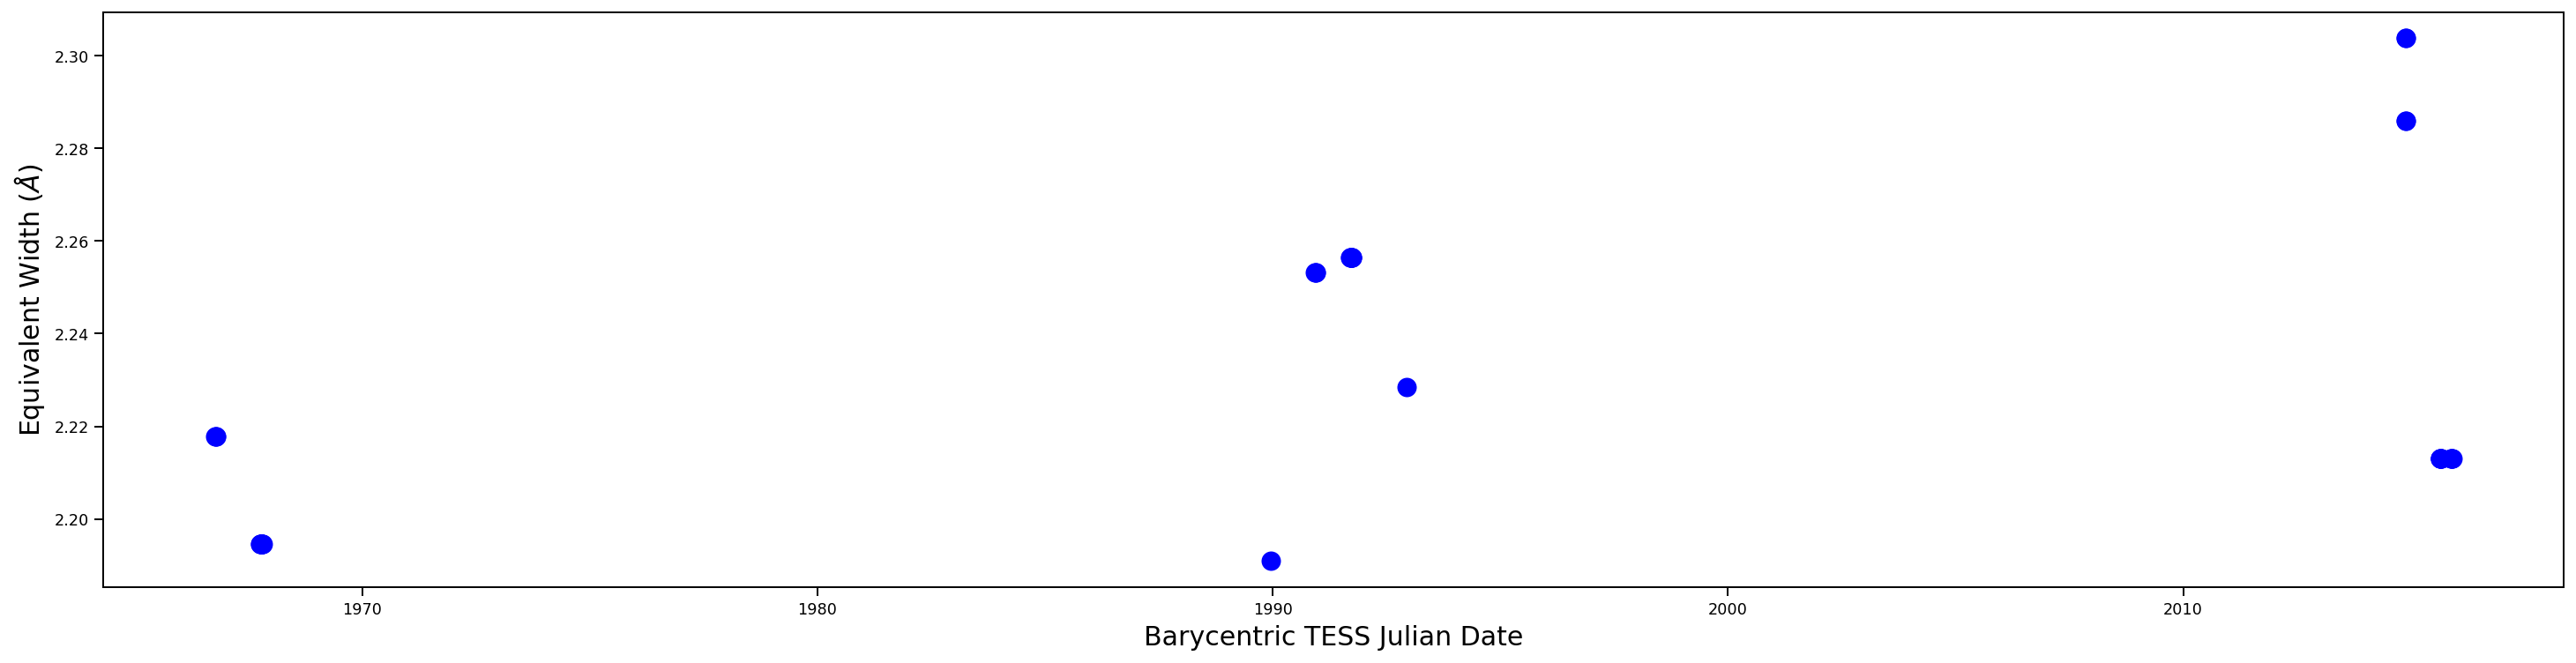

In [21]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=10)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

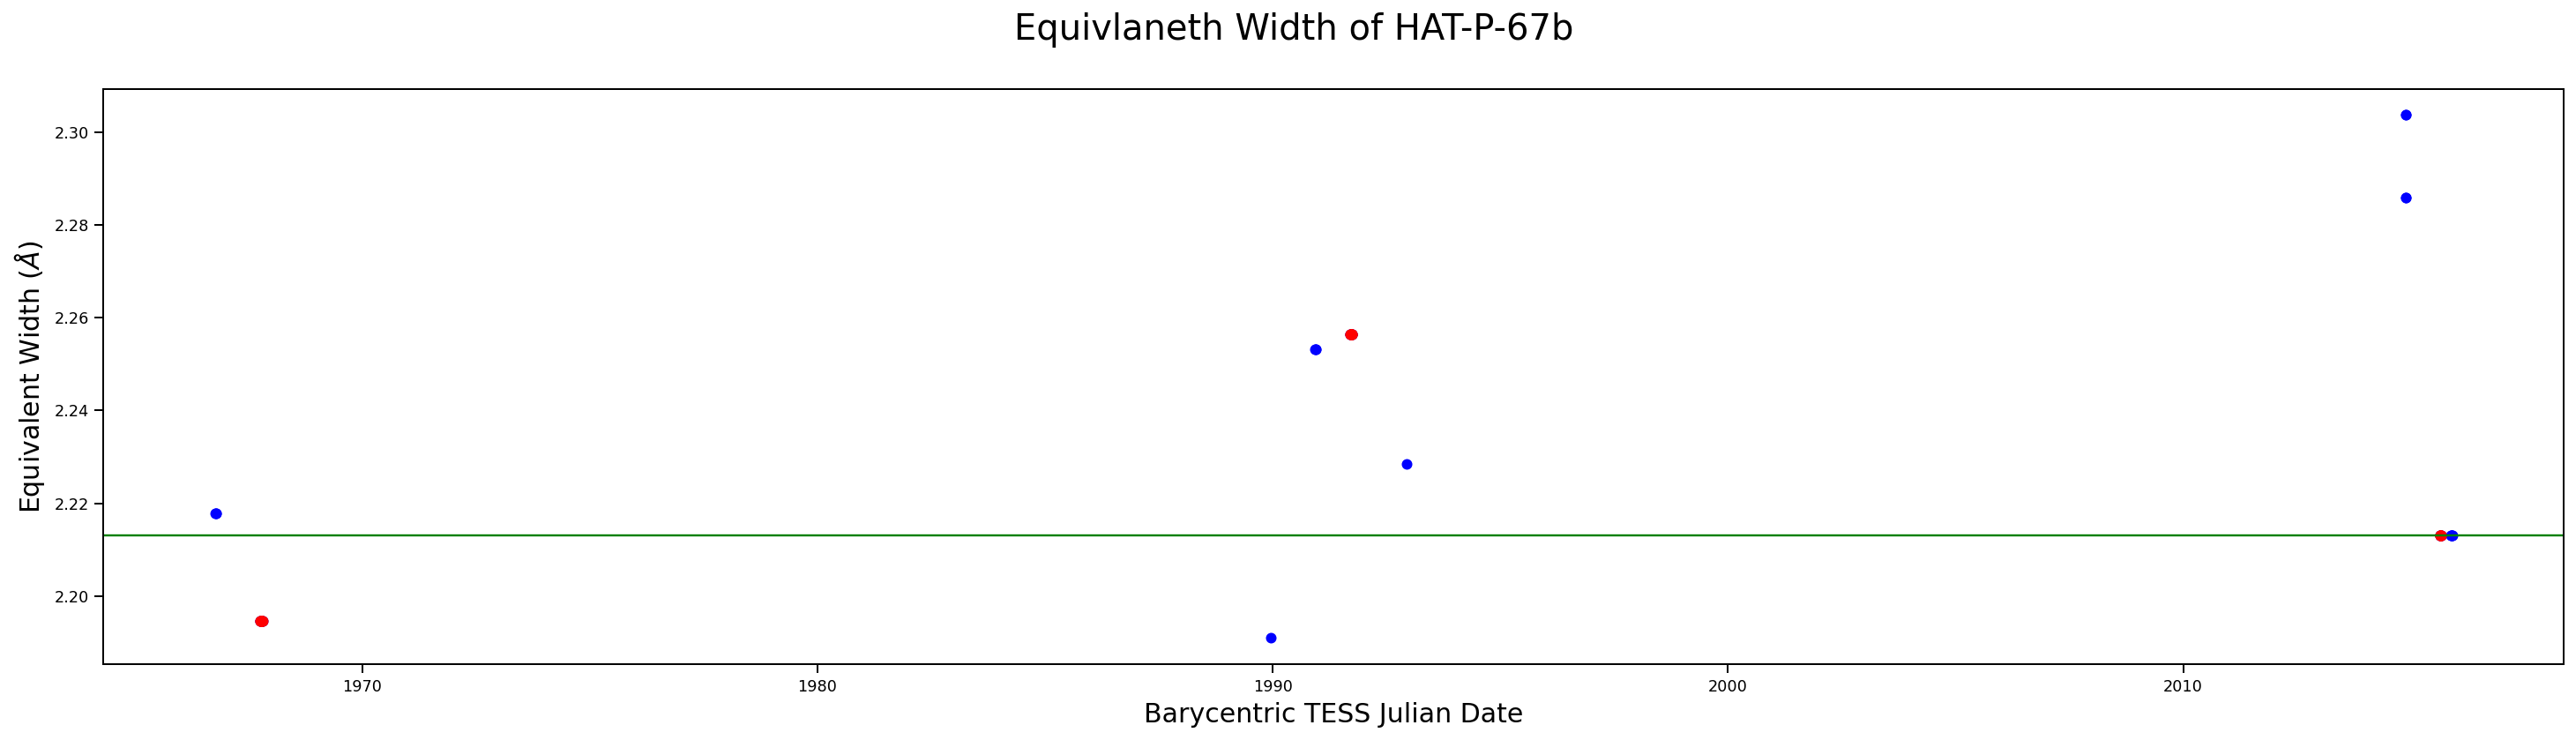

In [22]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=5)
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=5) #change index to jd for time
#plt.ylim(0)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's compute the normalized phase shifted so that the transit midpoint always occurs at zero while also seeing the light curve before and after the midpoint.

$$\phi=\frac{\mod(t-T_c+\frac{P}{2}\;,P)}{P} -0.5$$ 

In [23]:
df['phase']=np.mod(df.btjd-t_c_btjd+(orbital_period*0.5),orbital_period)-0.5*orbital_period
df['normalized_phase']=(df['phase']/orbital_period)

In [24]:
df.describe() #max less than orbital period, normalized less than 1

,ew_mcmc,ew_unc,int_wv,jd,qidx,ITIME,snr,ew_muler,ew,btjd,phase,normalized_phase
count,44.000000,44.000000,44.0,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1.574411,0.142355,8542.0,2.458993e+06,6667.886364,1684.636364,103.946433,2.227637,2.227637,1992.627915,-0.214535,-0.044601
std,0.460768,0.223274,0.0,2.000997e+01,216.734884,921.639791,12.954551,0.032031,0.032031,20.009974,0.501195,0.104196
min,-0.122556,0.014780,8542.0,2.458967e+06,6436.000000,1235.400000,75.404866,2.190935,2.190935,1966.770274,-1.802355,-0.374702
25%,1.671727,0.019700,8542.0,2.458968e+06,6437.000000,1235.400000,99.552342,2.194524,2.194524,1967.791855,-0.325299,-0.067628
50%,1.709054,0.024717,8542.0,2.458992e+06,6587.000000,1235.400000,102.062307,2.213003,2.213003,1991.716920,-0.032325,-0.006720
75%,1.745226,0.195364,8542.0,2.459016e+06,6938.000000,1235.400000,119.395566,2.256516,2.256516,2015.636230,0.078529,0.016326
max,1.810604,0.840801,8542.0,2.459016e+06,6943.000000,4323.900000,128.322329,2.303719,2.303719,2015.906562,1.186437,0.246655


Text(0, 0.5, 'Equivalent Width ($\\AA$)')

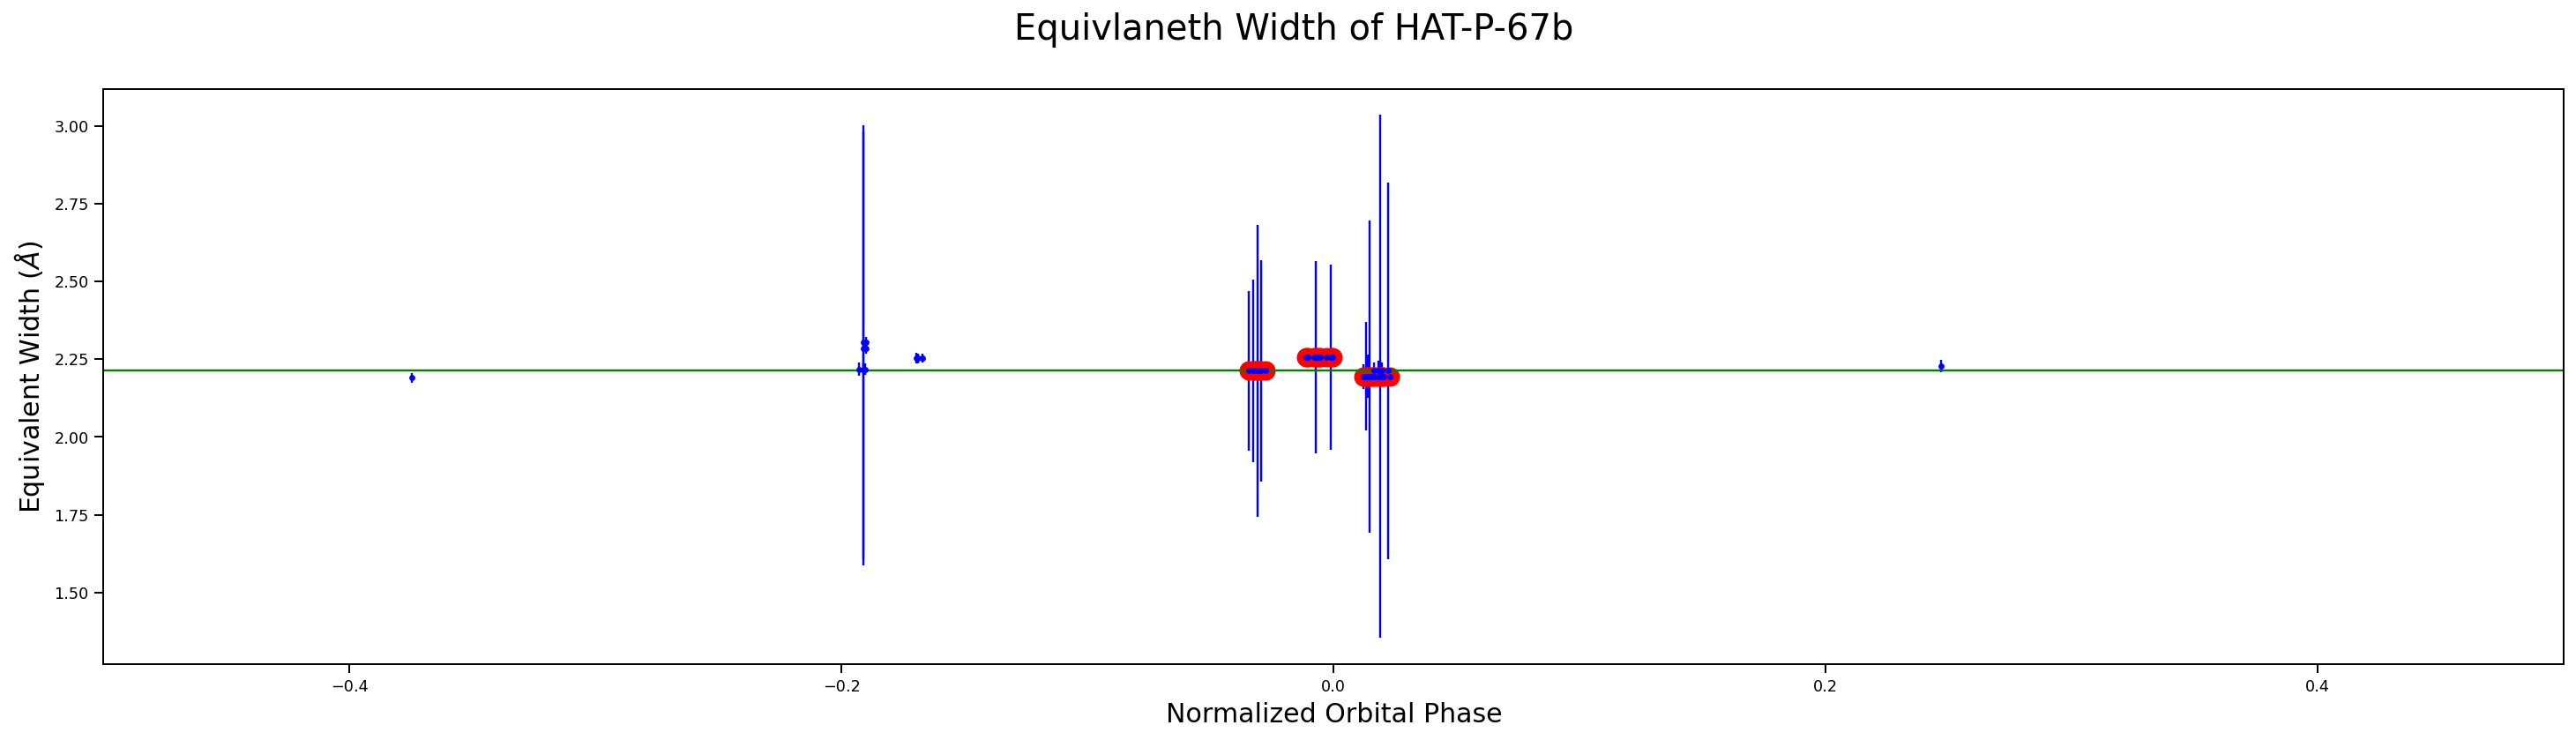

In [25]:
plt.figure(figsize=(25,6))

plt.errorbar(df.normalized_phase, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase-1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase+1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
plt.xlim(-.5,.5)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

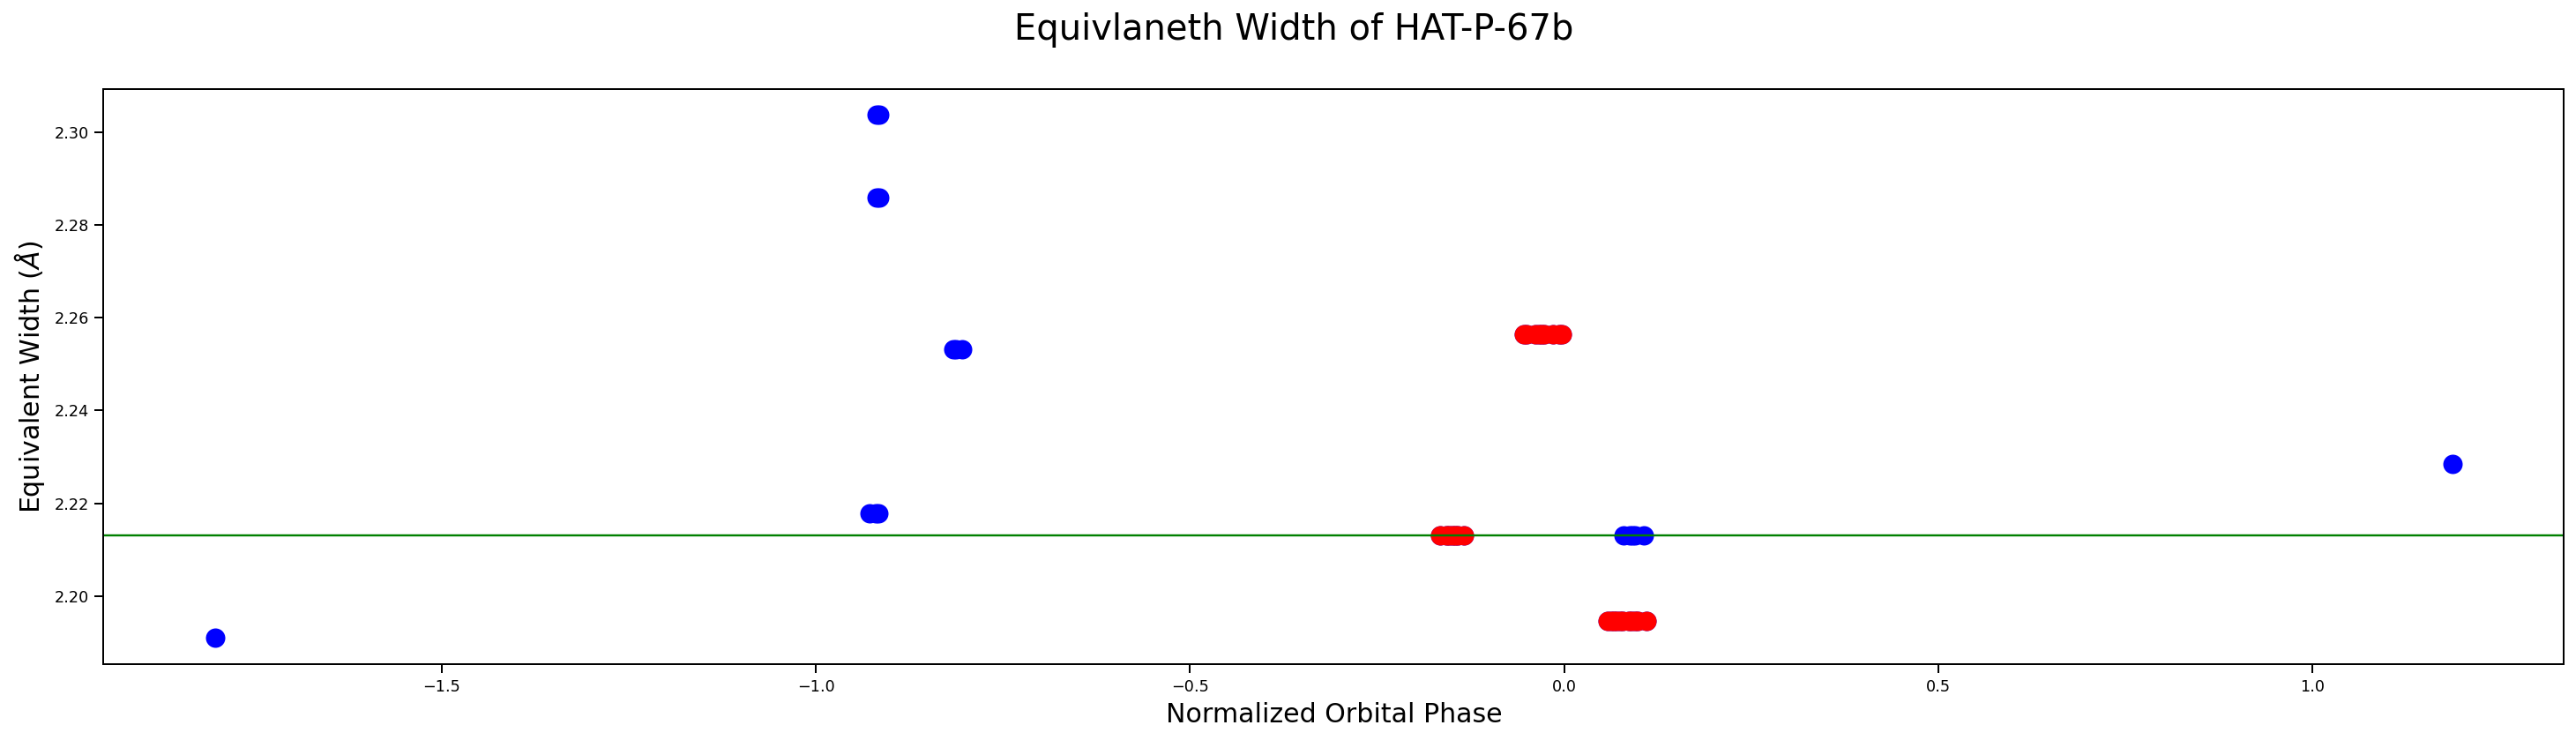

In [26]:
plt.figure(figsize=(25,6))

plt.plot(df.phase, df.ew, 'bo', markersize=10)
plt.plot(df.phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase-1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase+1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
#plt.xlim(-2,2)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's define a variable called 'shifted' in two steps.

In [27]:
second_half_mask = df.normalized_phase > 0.5
first_half_mask = ~second_half_mask

In [28]:
df['shifted']=df.normalized_phase
df.shifted[second_half_mask]=df.shifted[second_half_mask]-1
df.shifted[second_half_mask]

Series([], Name: shifted, dtype: float64)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

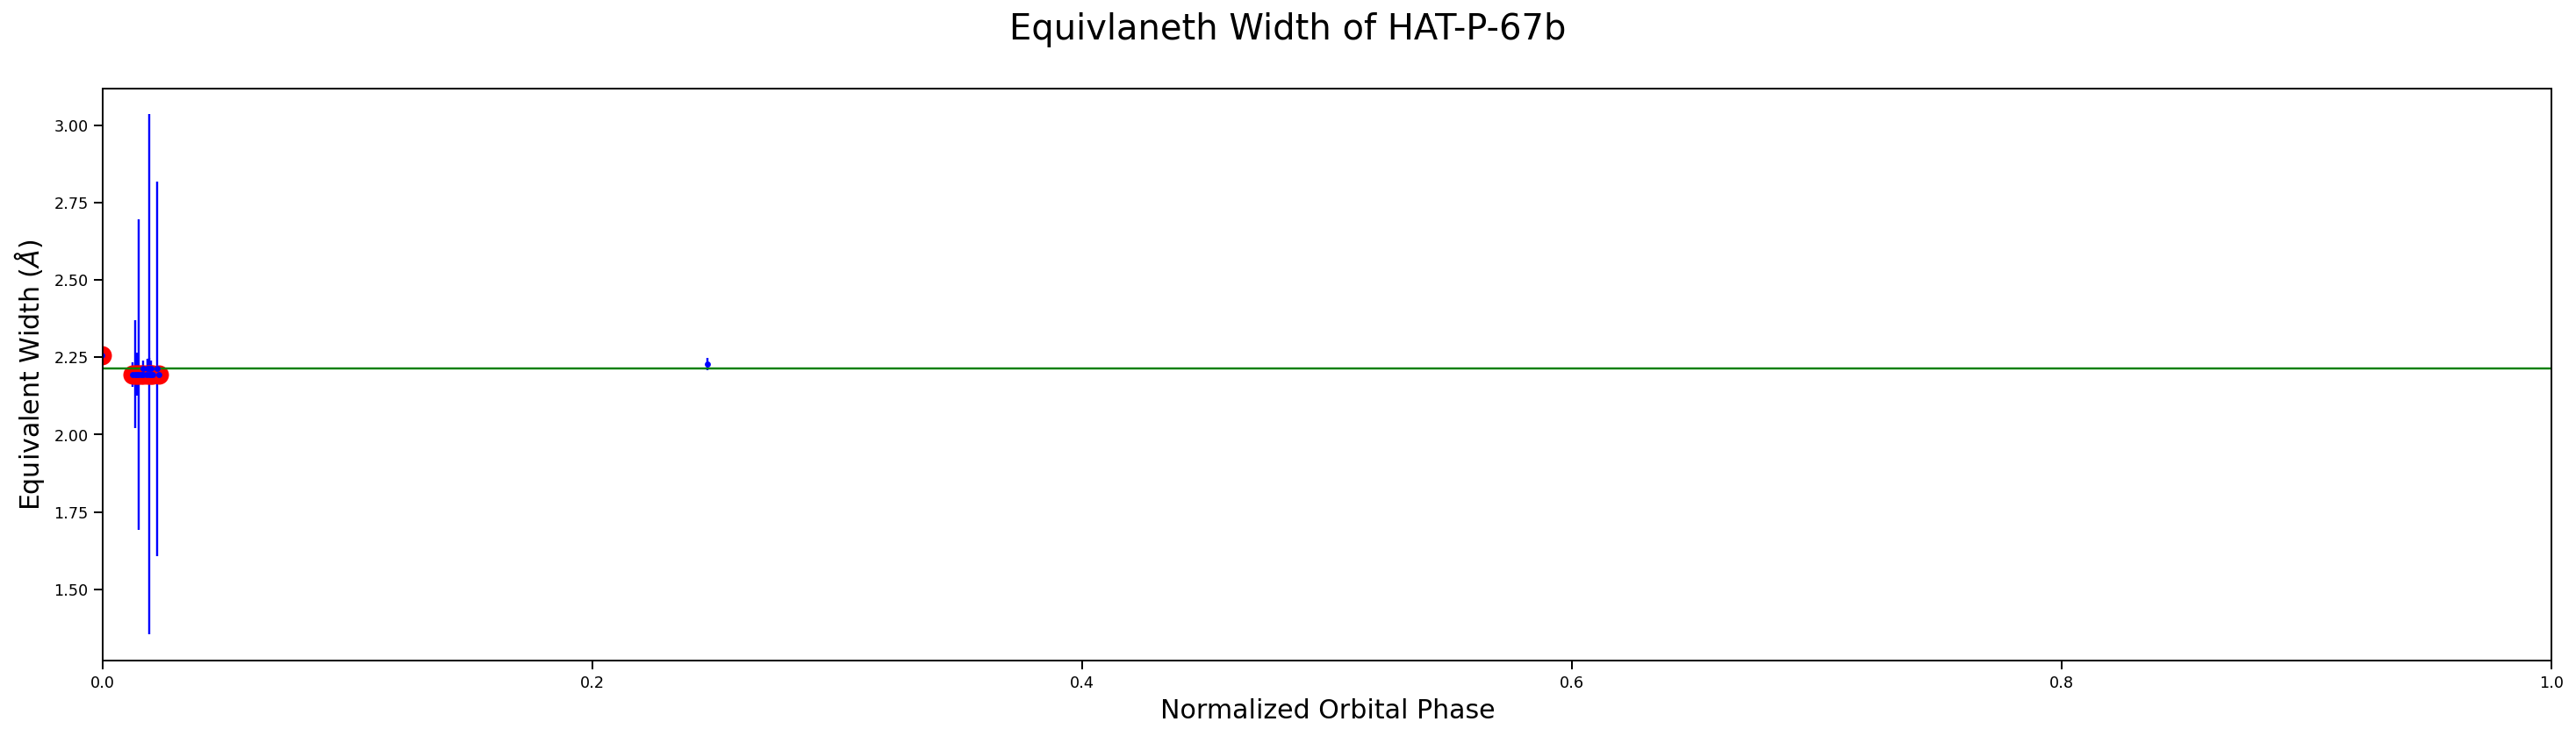

In [29]:
plt.figure(figsize=(25,6))
plt.errorbar(df.shifted, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.shifted[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0.9,1.32)
plt.xlim(0,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

# Light curve analysis with TESS

In [30]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[3].download()
lc_raw_2 = sr[0].download()

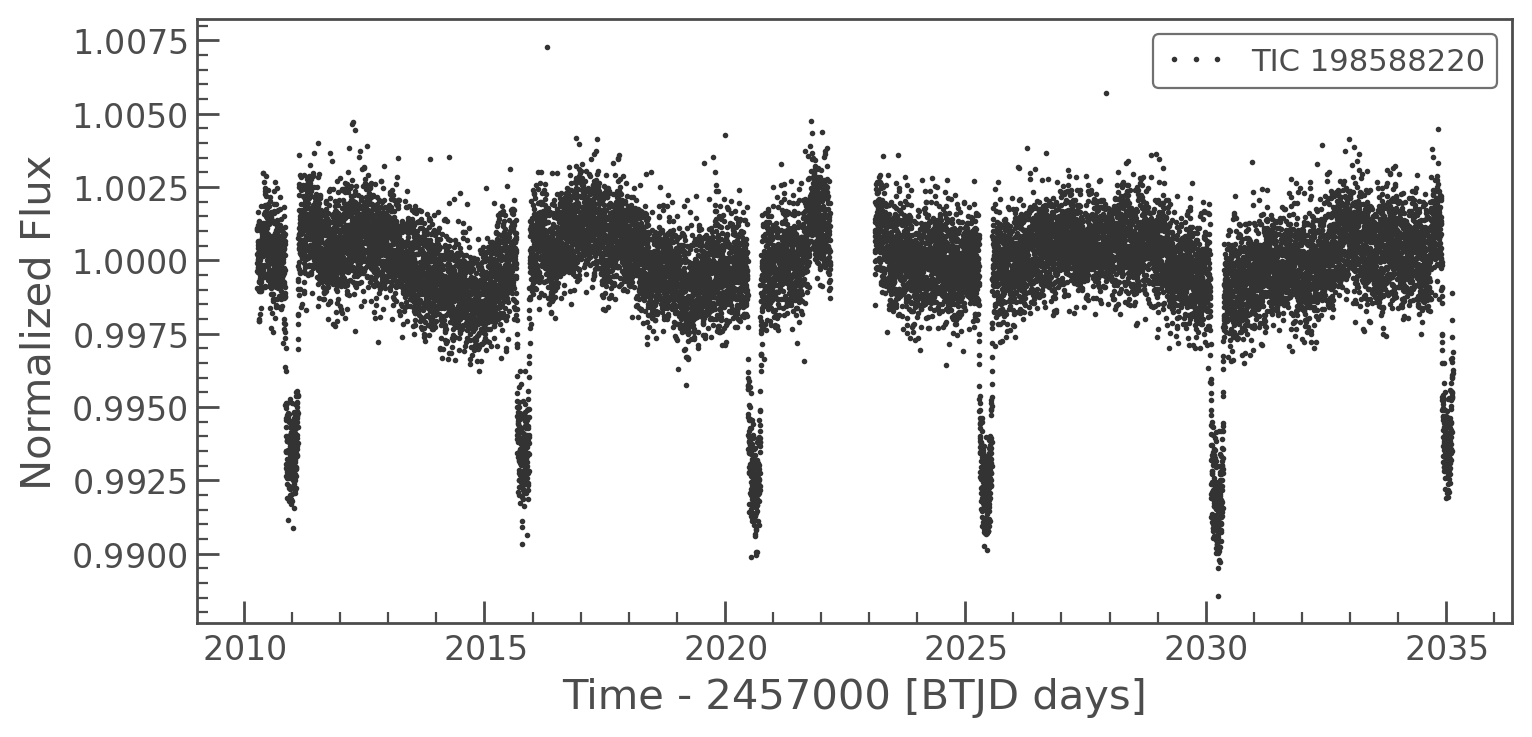

In [31]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

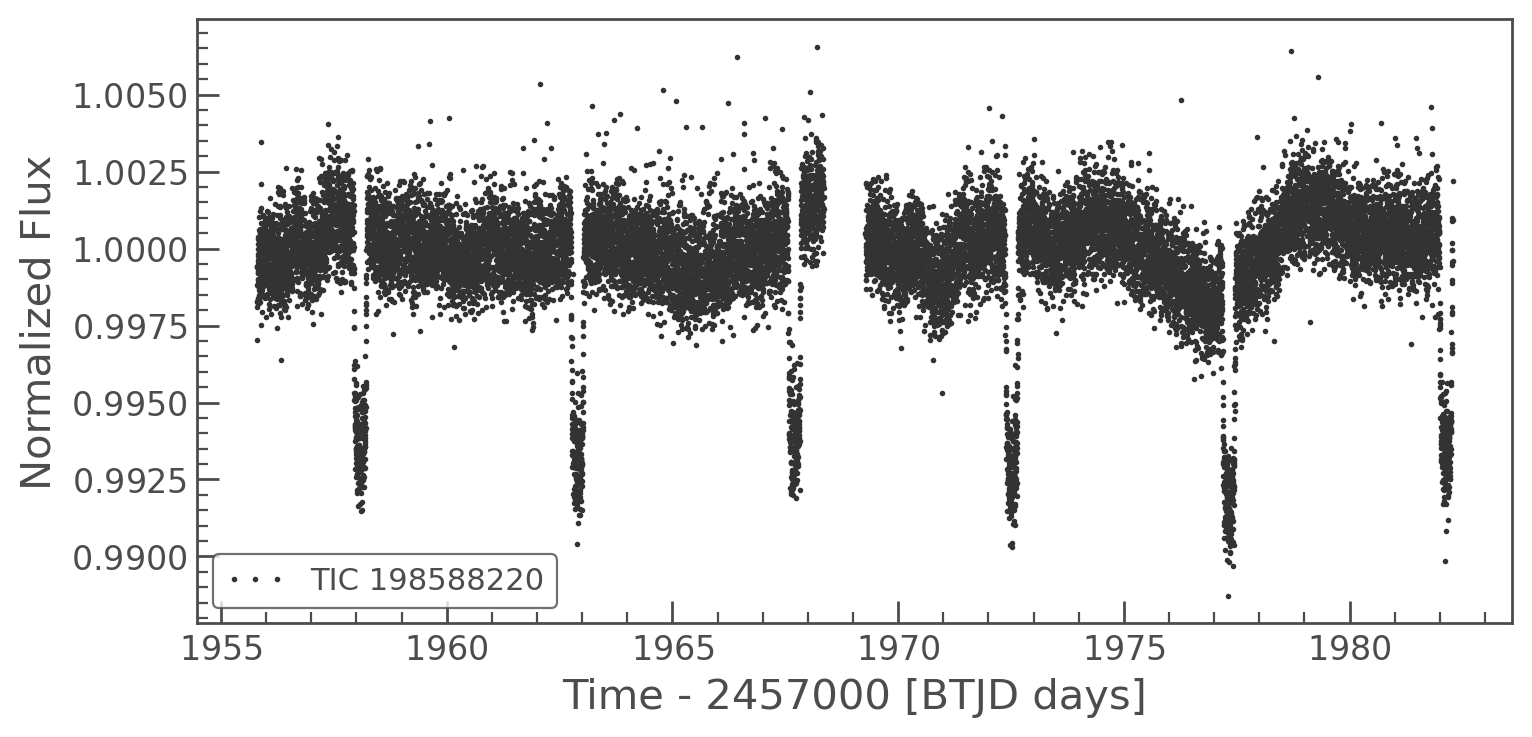

In [32]:
ax = lc_raw_2.normalize().plot(marker='.', linestyle='none')

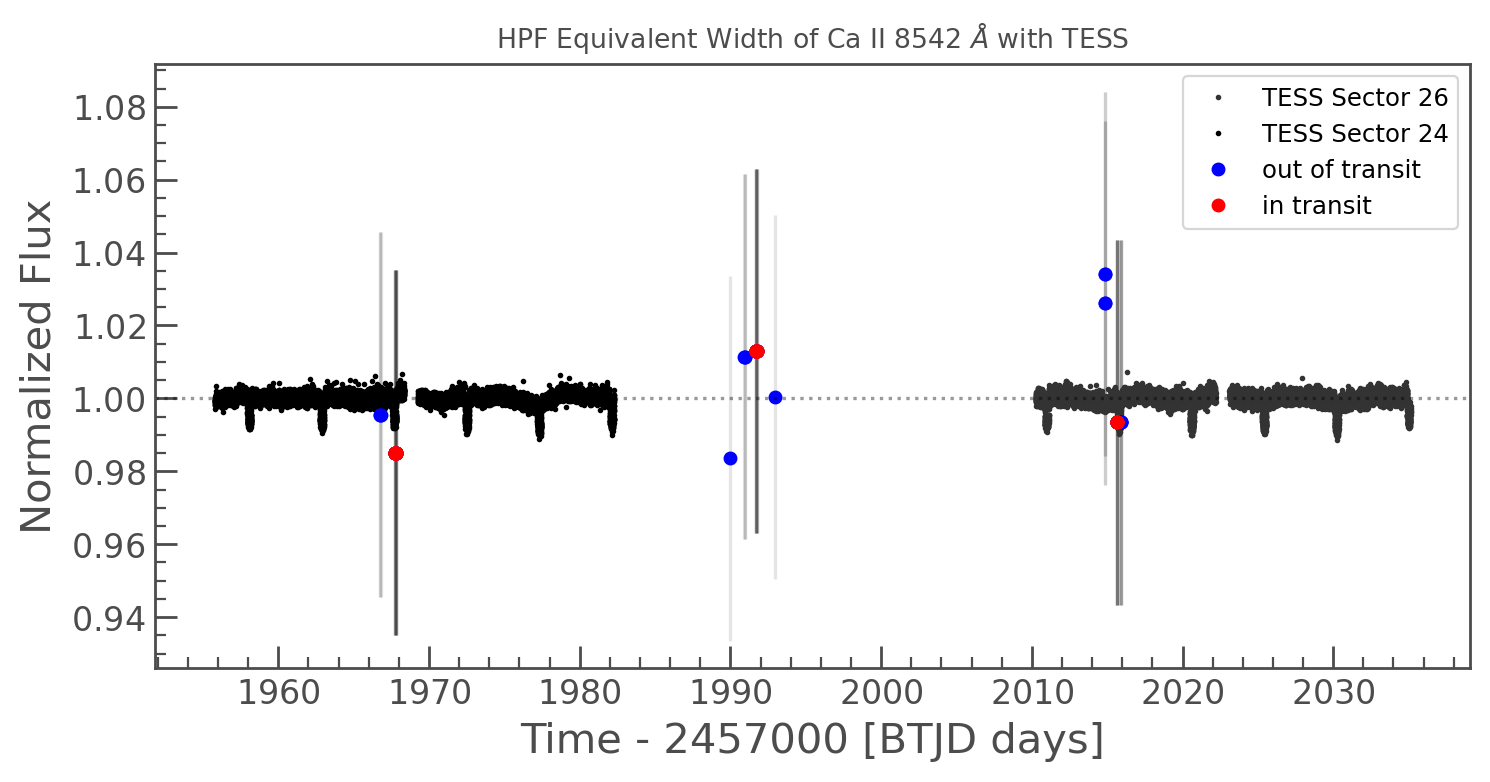

In [33]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none',label='TESS Sector 26')
lc_raw_2.normalize().plot(ax=ax, marker='.', linestyle='none',label='TESS Sector 24',color='k')
ax.plot(df.btjd, df.ew/np.mean(df.ew), 'bo', markersize=4, label = 'out of transit')
ax.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask]/np.mean(df.ew), 'ro', markersize=4, label = 'in transit')
ax.errorbar(df.btjd, df.ew/np.mean(df.ew), yerr=0.05,linestyle='none',color='k',alpha=0.1)
ax.axhline(1.0,linestyle='dotted',color='k',alpha=0.4)
plt.title('HPF Equivalent Width of Ca II 8542 $\AA$ with TESS') #hpf he and tess title
#ax.set_xlim(1965,1970)
plt.legend()
plt.savefig('C:/Users/jojoa/GitHub/disperse/figures/TESS_overplot_Ca_8542',bbox_inches="tight")
#ax.set_ylim(0, 1.05)

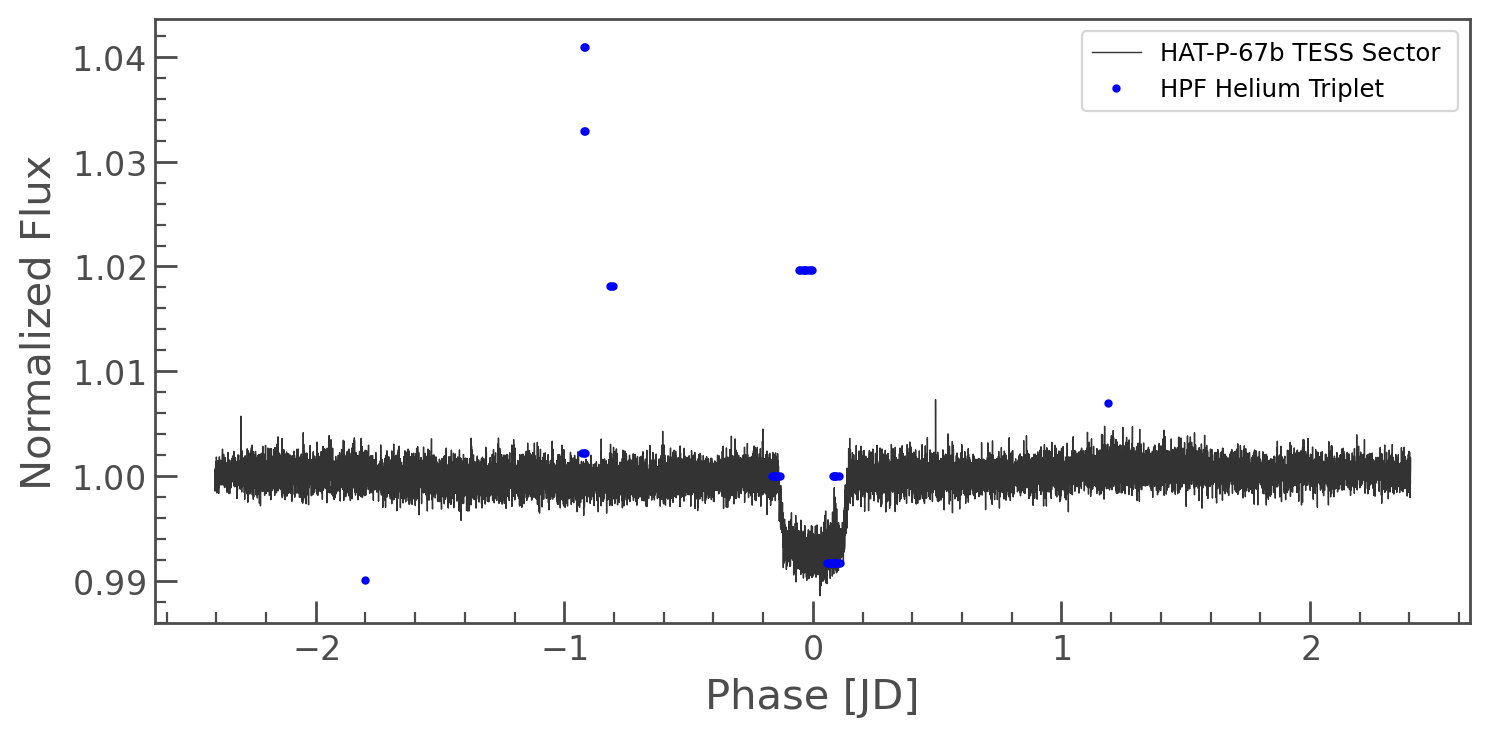

In [34]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector ')
plt.plot(df.phase, df.ew/np.median(df.ew), 'bo', markersize=2, label = 'HPF Helium Triplet')
plt.legend()
#plt.xlim(-.5,.5)
#plt.ylim(0)
#plt.savefig(f'../figures/TESS_EW_{target_name}_1.jpg')

In [ ]:
sr

# Exploring different exposure times in the same sector

In [ ]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[0].download()

In [ ]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

In [ ]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 24')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Helium Triplet')
plt.ylim(0)
plt.legend()
#plt.savefig(f'../figures/TESS_EW_{target_name}_0.jpg')
#ew bc of MCMC has very large error bars and gives us a noisy plot